# Import Libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as px
from textblob import TextBlob
import random
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Reading the data

In [86]:
Fashion=pd.read_csv("E:\\Rahul\\fashion_products_final.csv")

# Cleaning the Data

In [87]:
Fashion.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [88]:
Fashion.tail()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S
999,91,1000,Shoes,Adidas,Women's Fashion,79,3.093553,White,L


In [89]:
Fashion[34:56]

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
34,48,35,Jeans,Zara,Women's Fashion,37,4.173992,Blue,L
35,18,36,Dress,H&M,Kids' Fashion,74,1.014996,Green,S
36,27,37,Sweater,Zara,Kids' Fashion,48,4.947665,Blue,S
37,60,38,T-shirt,Nike,Kids' Fashion,76,2.663068,Yellow,S
38,46,39,Jeans,Adidas,Men's Fashion,90,1.788772,Yellow,M
39,84,40,Dress,Zara,Women's Fashion,26,2.435611,Black,XL
40,43,41,Jeans,Gucci,Women's Fashion,40,2.922174,Blue,L
41,43,42,Shoes,Zara,Kids' Fashion,43,1.671959,Red,S
42,91,43,T-shirt,Adidas,Men's Fashion,39,3.601869,White,M
43,78,44,Jeans,Nike,Kids' Fashion,74,2.039157,White,M


In [90]:
Fashion.shape

(1000, 9)

In [91]:
Fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [92]:
Fashion.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [93]:
Fashion.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [94]:
Fashion.describe(include='all')

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
count,1000.00000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,5,5,3,NaN,NaN,6,4
top,NaN,NaN,Jeans,Nike,Kids' Fashion,NaN,NaN,White,XL
freq,NaN,NaN,231,214,351,NaN,NaN,193,254
mean,50.41900,500.500000,NaN,NaN,NaN,55.785000,2.993135,NaN,NaN
std,28.78131,288.819436,NaN,NaN,NaN,26.291748,1.153185,NaN,NaN
min,1.00000,1.000000,NaN,NaN,NaN,10.000000,1.000967,NaN,NaN
25%,26.00000,250.750000,NaN,NaN,NaN,33.000000,1.992786,NaN,NaN
50%,50.00000,500.500000,NaN,NaN,NaN,57.000000,2.984003,NaN,NaN
75%,75.00000,750.250000,NaN,NaN,NaN,78.250000,3.985084,NaN,NaN


In [95]:
my_list=list(Fashion)

In [96]:
print(my_list)

['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Color', 'Size']


# Analyse the Data

# Detail About User ID

In [97]:
Fashion['User ID'].value_counts()

User ID
37    18
65    17
34    16
89    15
80    15
      ..
14     5
45     5
85     4
86     3
47     2
Name: count, Length: 100, dtype: int64

# Graphical Analysis of User ID

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  

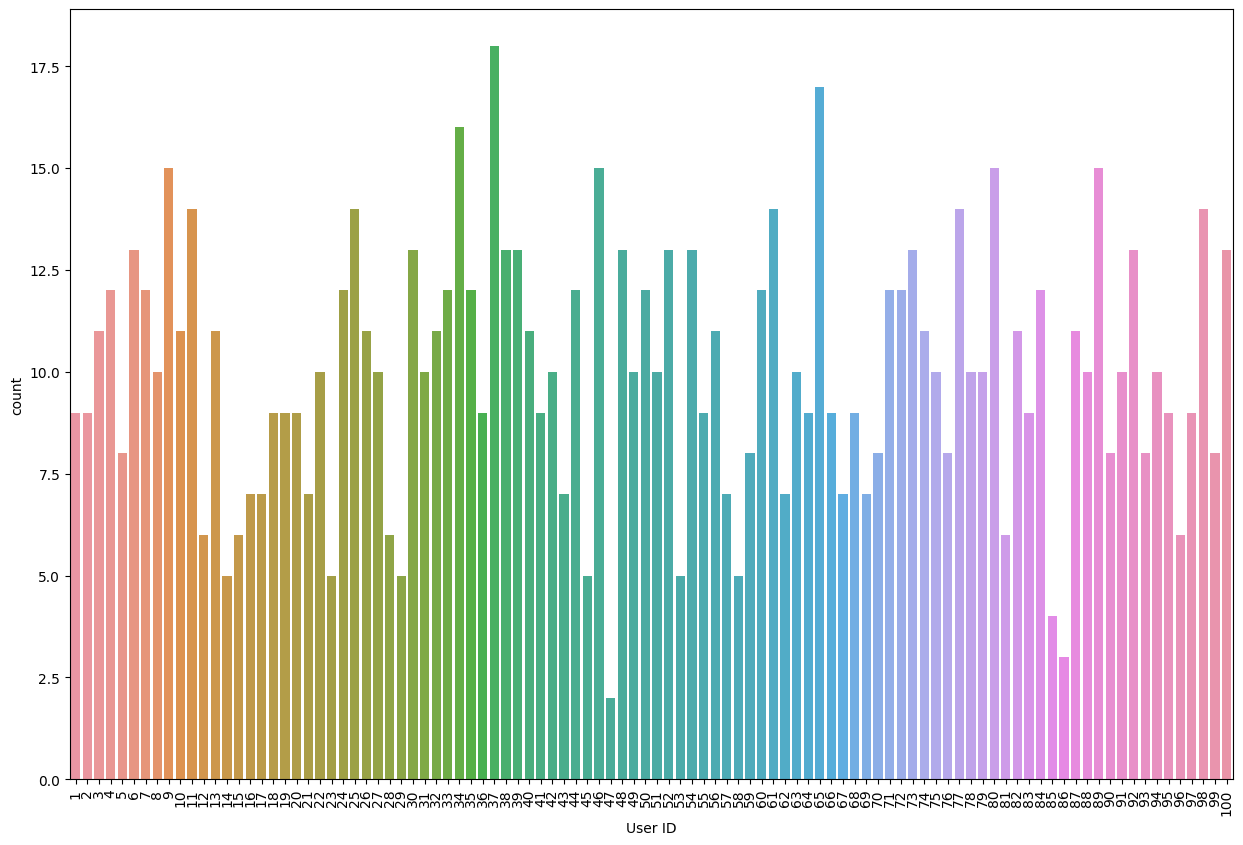

In [98]:
plt.figure(figsize=(15,10))
sns.countplot(x='User ID', data=Fashion)
plt.xticks(rotation='vertical')

Above Histogram Graph Show's that User ID of Number 33 has Highest Count

# Detail About Product ID

In [99]:
Fashion['Product ID'].value_counts()

Product ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64

# Detail About Product Name

In [100]:
Fashion['Product Name'].value_counts()

Product Name
Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: count, dtype: int64

# Graphical Analysis of Product Name

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dress'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'T-shirt'),
  Text(3, 0, 'Jeans'),
  Text(4, 0, 'Sweater')])

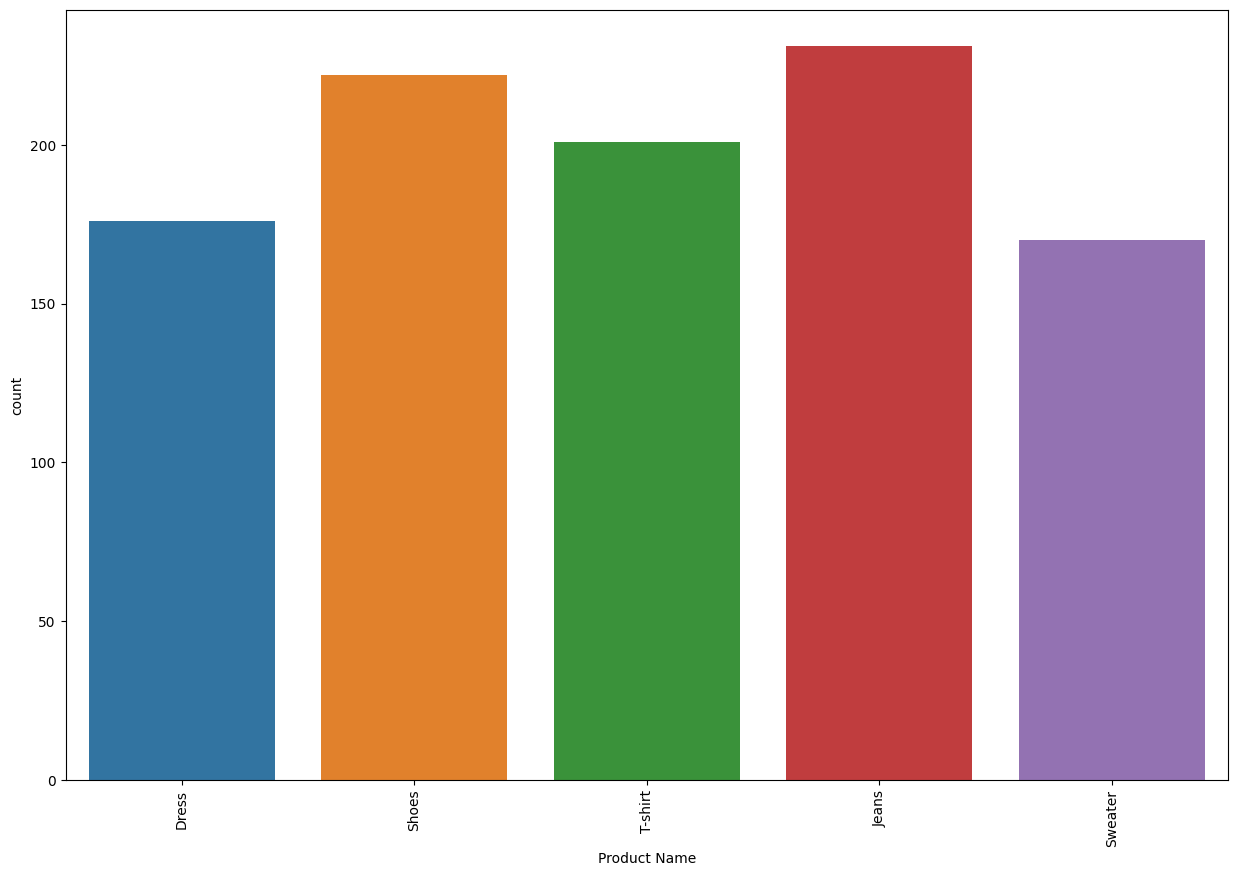

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(x='Product Name', data=Fashion)
plt.xticks(rotation='vertical')

Above graph Shows that Jeans has highest Product

# Detail About Brand

In [102]:
Fashion['Brand'].value_counts()

Brand
Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: count, dtype: int64

# Graphical Analysis of Brand

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Adidas'),
  Text(1, 0, 'H&M'),
  Text(2, 0, 'Zara'),
  Text(3, 0, 'Gucci'),
  Text(4, 0, 'Nike')])

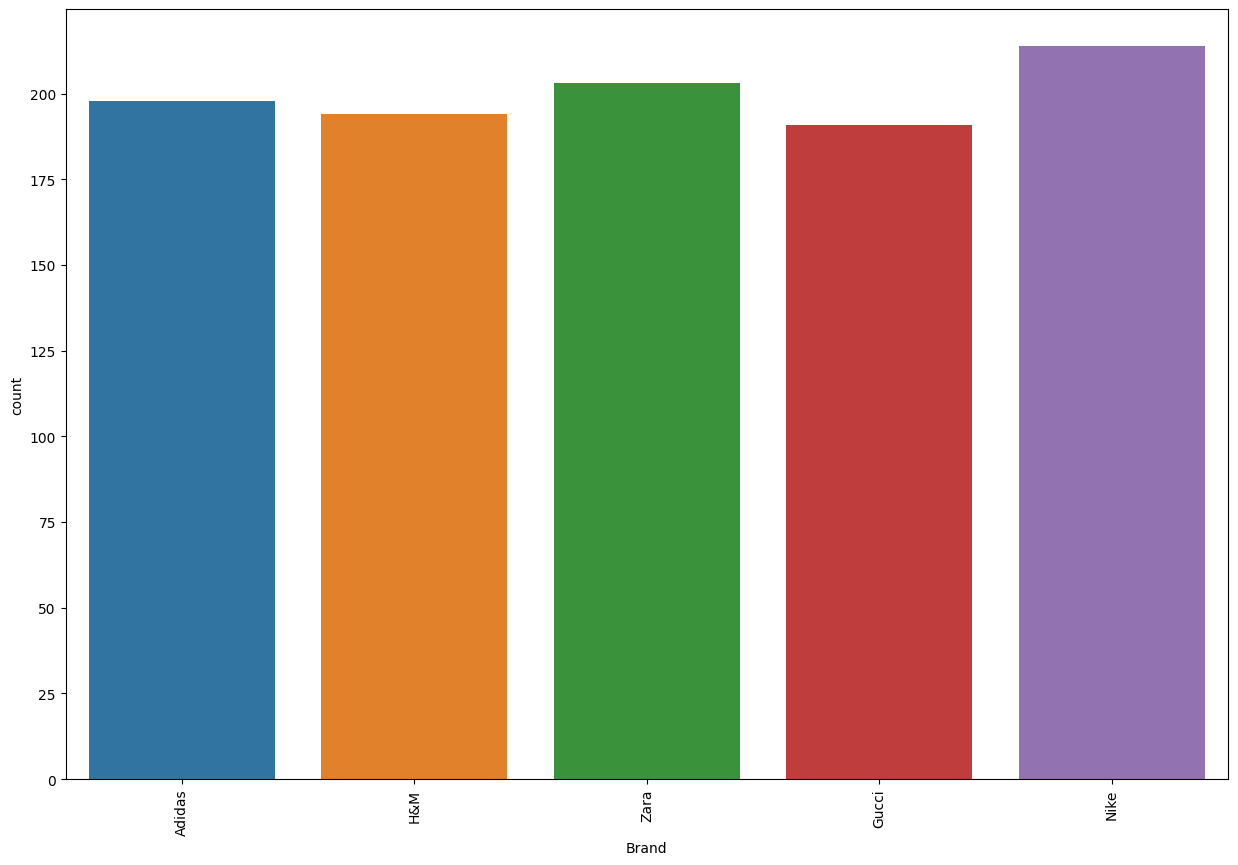

In [103]:
plt.figure(figsize=(15,10))
sns.countplot(x='Brand', data=Fashion)
plt.xticks(rotation='vertical')

Above Graph Shows that Nike Brand has highest Count

# Detail About Category

In [104]:
Fashion['Category'].value_counts()

Category
Kids' Fashion      351
Women's Fashion    327
Men's Fashion      322
Name: count, dtype: int64

# Graphical Analysis of Category

(array([0, 1, 2]),
 [Text(0, 0, "Men's Fashion"),
  Text(1, 0, "Women's Fashion"),
  Text(2, 0, "Kids' Fashion")])

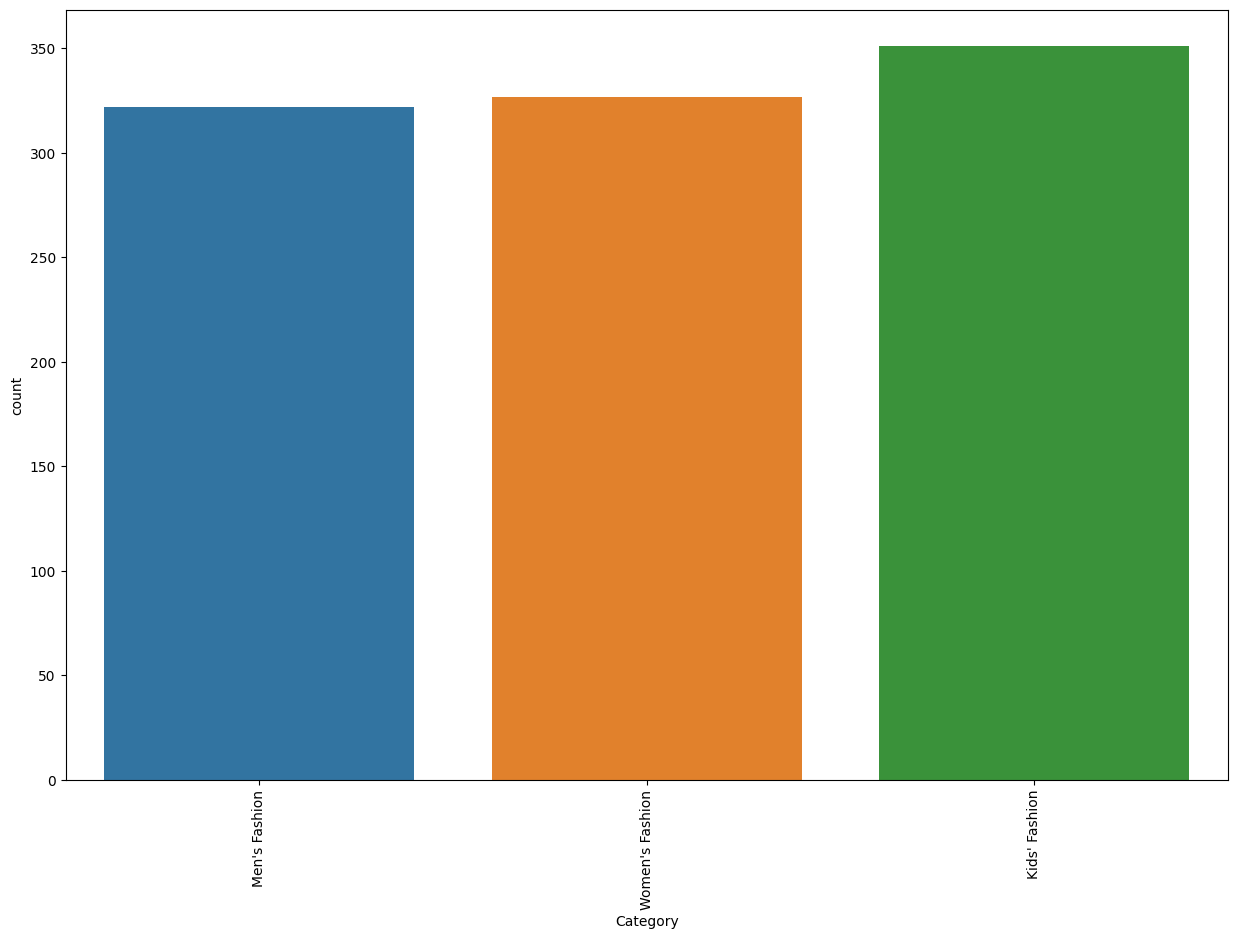

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=Fashion)
plt.xticks(rotation='vertical')

Above Graph Shows that Kid's Wear are more sold out Product

# Detail About Price

In [106]:
Fashion['Price'].value_counts()

Price
96     18
80     18
68     18
55     18
85     16
       ..
65      7
54      6
100     6
87      5
46      4
Name: count, Length: 91, dtype: int64

# Graphical Analysis of Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '12'),
  Text(3, 0, '13'),
  Text(4, 0, '14'),
  Text(5, 0, '15'),
  Text(6, 0, '16'),
  Text(7, 0, '17'),
  Text(8, 0, '18'),
  Text(9, 0, '19'),
  Text(10, 0, '20'),
  Text(11, 0, '21'),
  Text(12, 0, '22'),
  Text(13, 0, '23'),
  Text(14, 0, '24'),
  Text(15, 0, '25'),
  Text(16, 0, '26'),
  Text(17, 0, '27'),
  Text(18, 0, '28'),
  Text(19, 0, '29'),
  Text(20, 0, '30'),
  Text(21, 0, '31'),
  Text(22, 0, '32'),
  Text(23, 0, '33'),
  Text(24, 0, '34'),
  Text(25, 0, '35'),
  Text(26, 0, '36'),
  Text(27, 0, '37'),
  Text(2

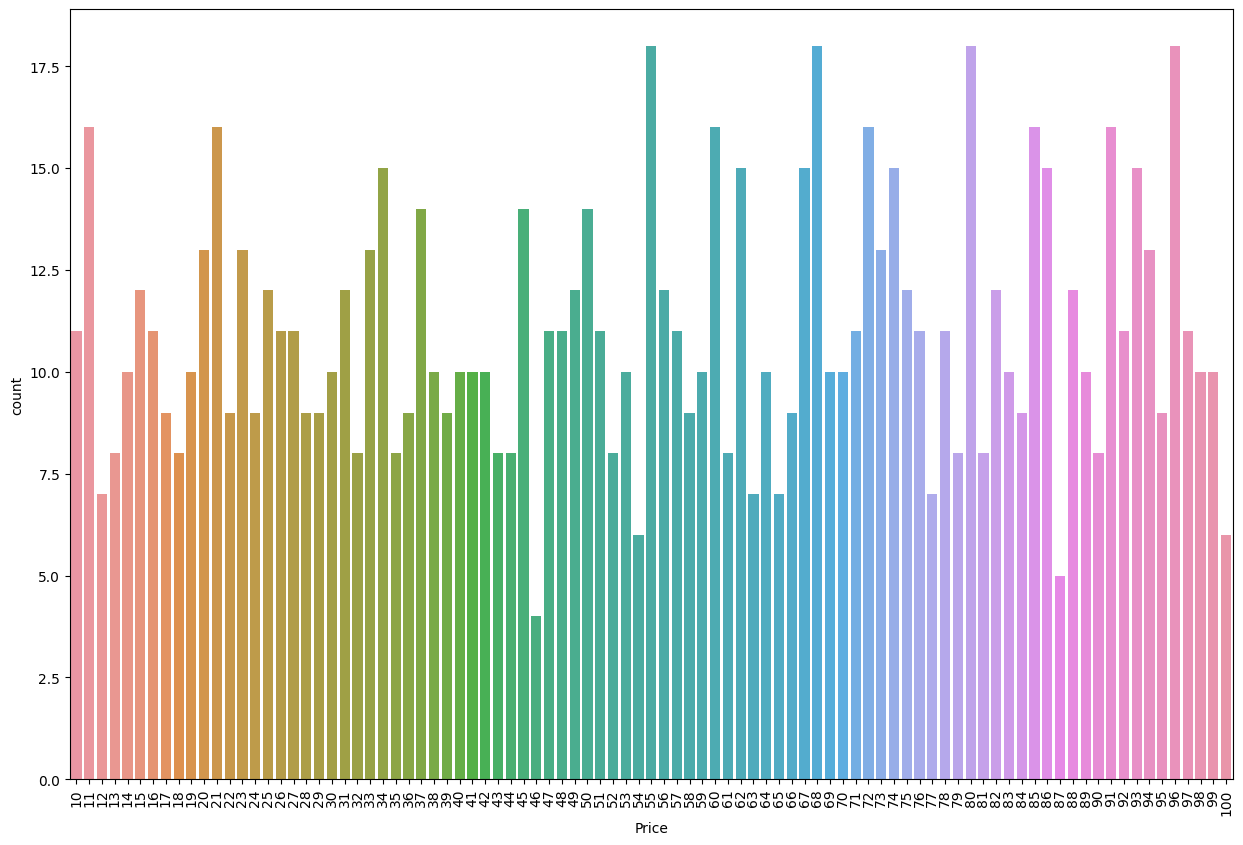

In [107]:
plt.figure(figsize=(15,10))
sns.countplot(x='Price', data=Fashion)
plt.xticks(rotation='vertical')

Above Graph Shoe the Price of Each Item Whether it is of Men's Wear,Women Wear's or Kid's Wear

# Detail About Rating

In [108]:
Fashion['Rating'].value_counts()

Rating
1.043159    1
2.958263    1
1.024990    1
2.689886    1
1.533612    1
           ..
1.804017    1
1.246472    1
4.473673    1
3.979717    1
3.093553    1
Name: count, Length: 1000, dtype: int64

# Detail About Color

In [109]:
Fashion['Color'].value_counts()

Color
White     193
Yellow    175
Blue      172
Green     156
Black     154
Red       150
Name: count, dtype: int64

# Graphical Analysis of Color

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Yellow'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Blue'),
  Text(4, 0, 'Green'),
  Text(5, 0, 'Red')])

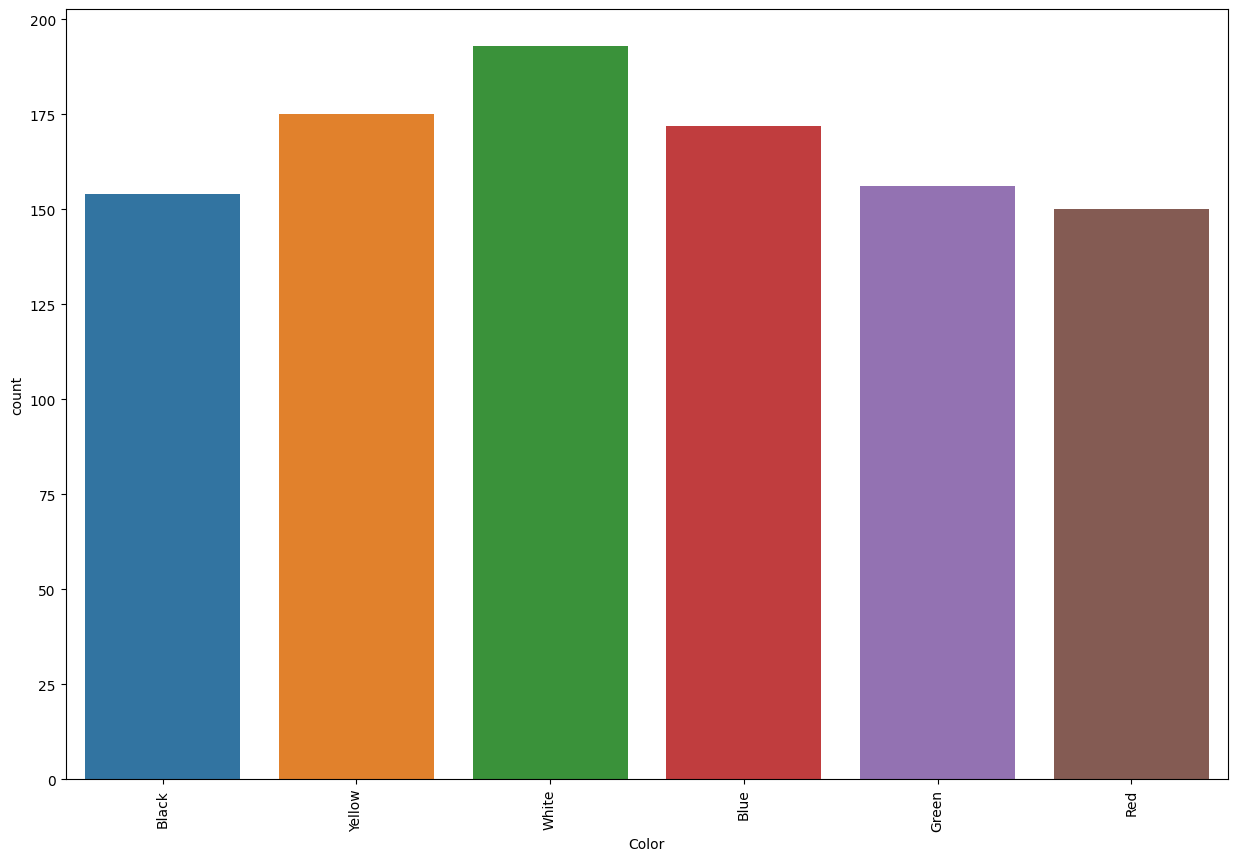

In [110]:
plt.figure(figsize=(15,10))
sns.countplot(x='Color', data=Fashion)
plt.xticks(rotation='vertical')

White Color clothes are Sold too many as compare to anyother color  

# Detail About Size

In [111]:
Fashion['Size'].value_counts()

Size
XL    254
L     251
S     249
M     246
Name: count, dtype: int64

# Graphical Analysis of Size

(array([0, 1, 2, 3]),
 [Text(0, 0, 'XL'), Text(1, 0, 'L'), Text(2, 0, 'S'), Text(3, 0, 'M')])

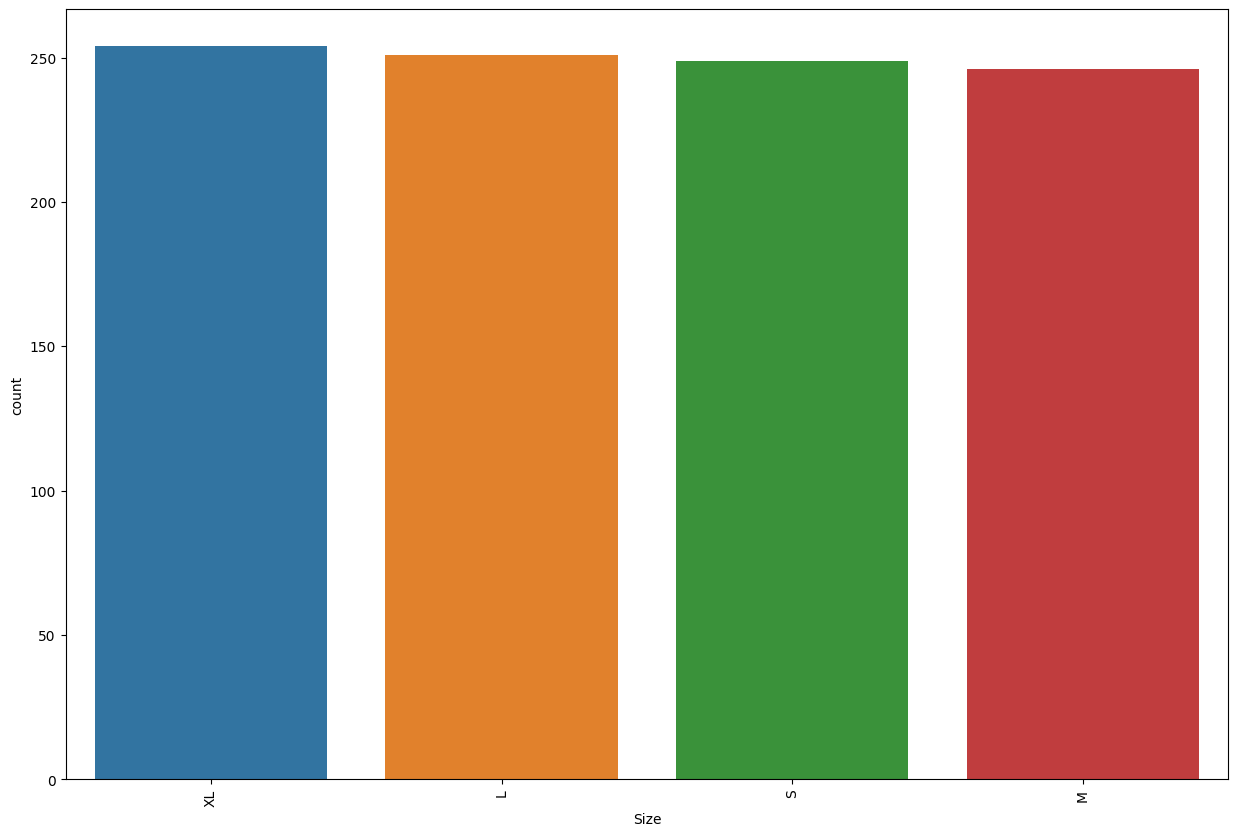

In [112]:
plt.figure(figsize=(15,10))
sns.countplot(x='Size', data=Fashion)
plt.xticks(rotation='vertical')

XL Size are sold Generally as compare to others

# Pie Chart

# Pie Chart Of User ID and Product ID

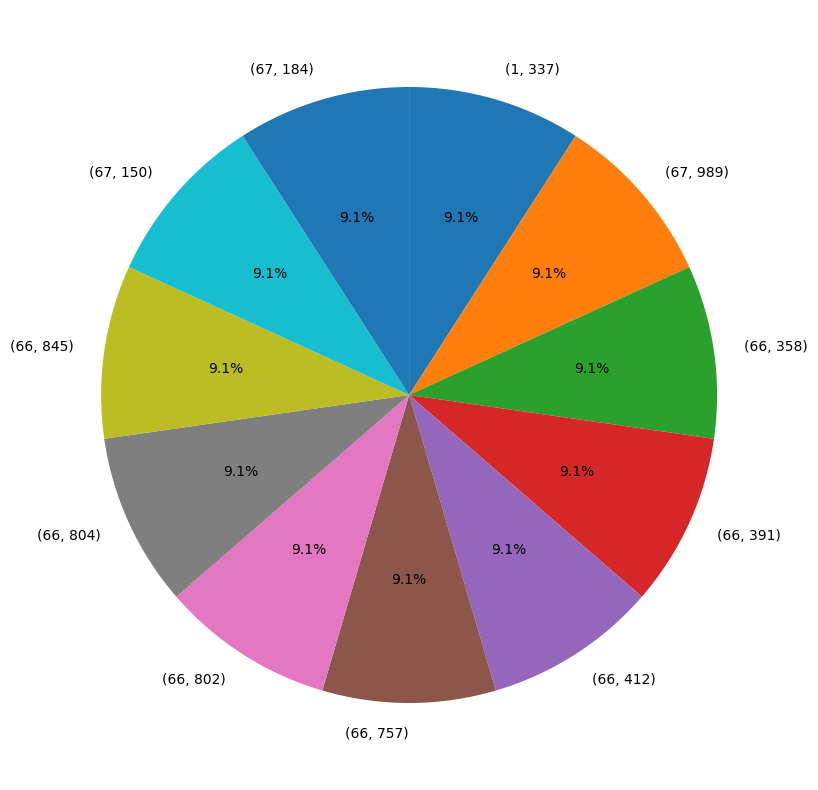

In [113]:
plt.figure(figsize=(10,10))
plt.pie(list(Fashion[['User ID','Product ID']].value_counts())[0:11],labels=list(Fashion[['User ID','Product ID']].value_counts().keys())[0:11],autopct='%0.1f%%',startangle=90,
       counterclock=False)
plt.show()

# Pie Chart of User ID and Price

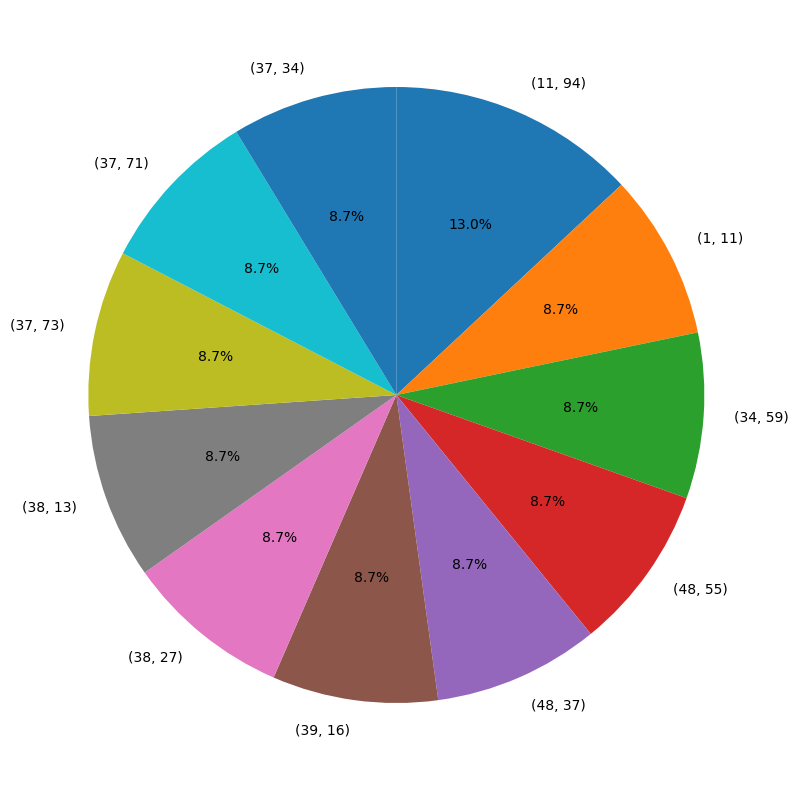

In [114]:
plt.figure(figsize=(10,10))
plt.pie(list(Fashion[['User ID','Price']].value_counts())[0:11],labels=list(Fashion[['User ID','Price']].value_counts().keys())[0:11],autopct='%0.1f%%',startangle=90,
       counterclock=False)
plt.show()

# Pie Chart of User ID and Product Name

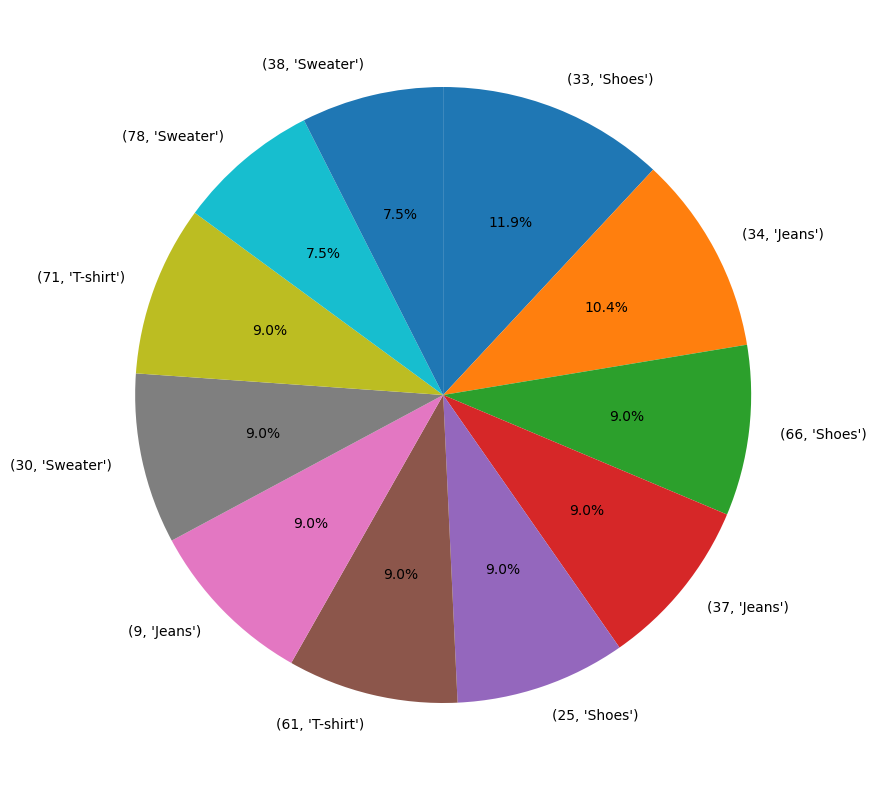

In [115]:
plt.figure(figsize=(10,10))
plt.pie(list(Fashion[['User ID','Product Name']].value_counts())[0:11],labels=list(Fashion[['User ID','Product Name']].value_counts().keys())[0:11],autopct='%0.1f%%',startangle=90,
       counterclock=False)
plt.show()

# Pie Chart of Category and Color

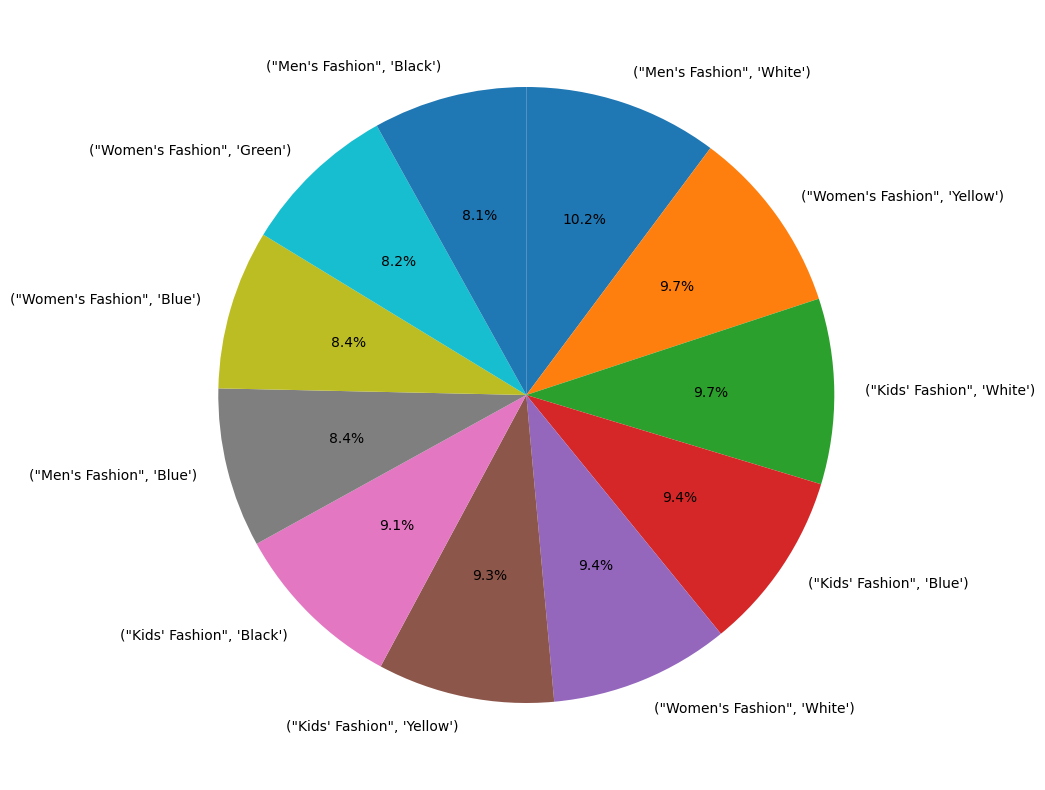

In [126]:
plt.figure(figsize=(10,10))
plt.pie(list(Fashion[['Category','Color']].value_counts())[0:11],labels=list(Fashion[['Category','Color']].value_counts().keys())[0:11],autopct='%0.1f%%',startangle=90,
       counterclock=False)
plt.show()

# Calculate the ratio of Product Name and size?

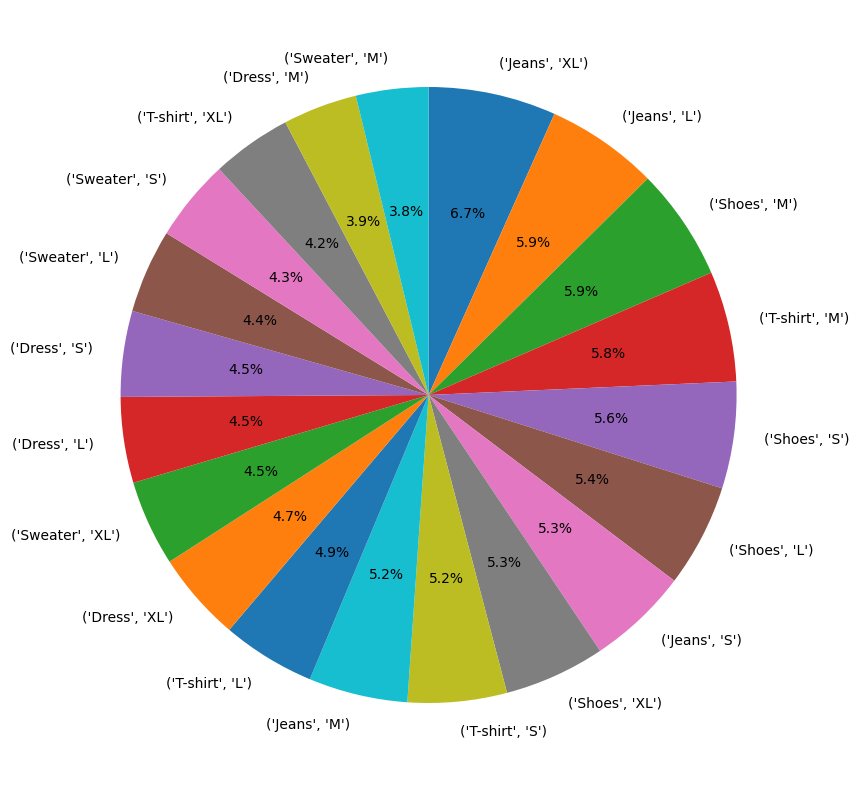

In [127]:
plt.figure(figsize=(15,10))
plt.pie(list(Fashion[['Product Name','Size']].value_counts()),
       labels=list(Fashion[['Product Name','Size']].value_counts().keys()),
       autopct="%0.1f%%",
       startangle=90,
       counterclock=False,
       )
plt.show()

# Histogram Of User ID,Product ID,Price and Rating

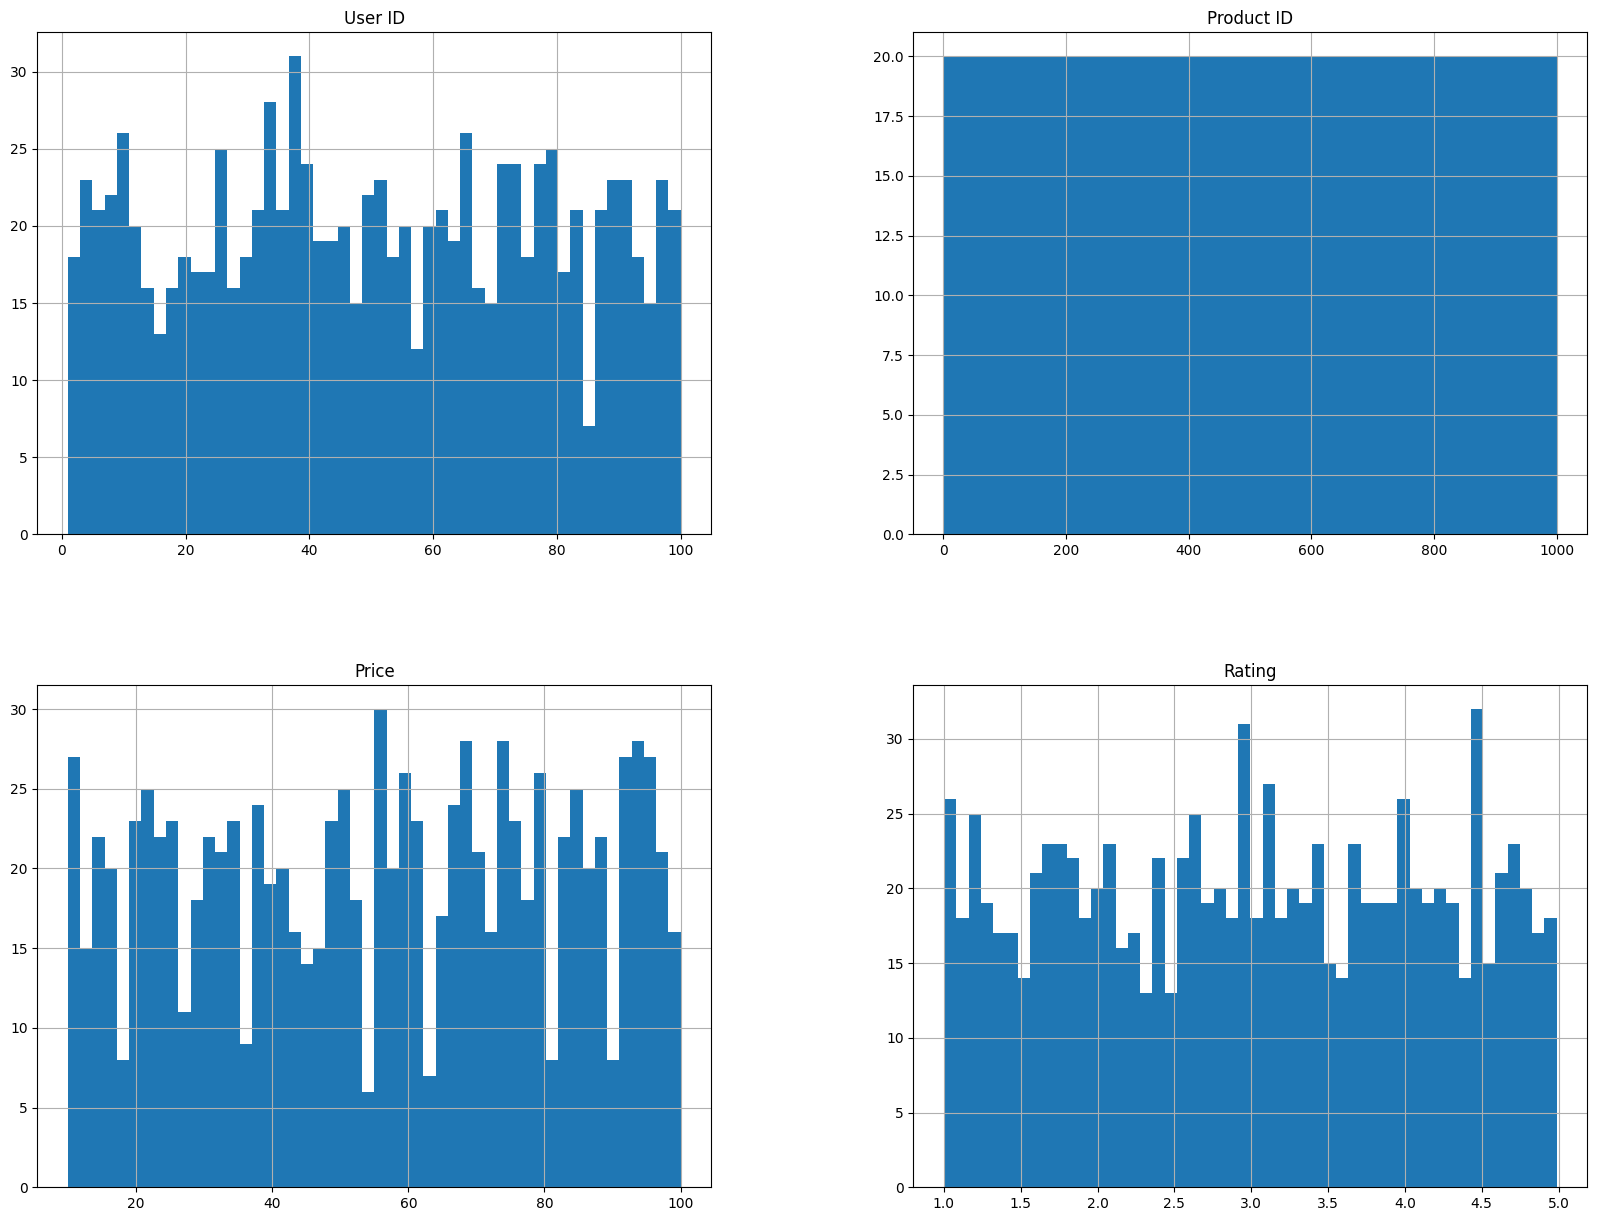

In [116]:
Fashion.hist(bins=50, figsize=(20,15))
plt.show()

# HeatMap

# HeatMap Of Price,User ID and Product ID

In [117]:
df_corr=Fashion[['Price','User ID','Product ID']]

In [118]:
df_corr.corr()

,Price,User ID,Product ID
Price,1.000000,0.003363,0.034602
User ID,0.003363,1.000000,-0.021075
Product ID,0.034602,-0.021075,1.000000


<Axes: >

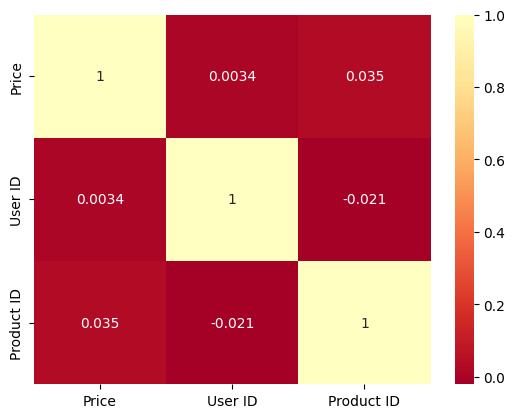

In [119]:
sns.heatmap(df_corr.corr(),center = True , annot=True,cmap="RdYlBu")

Heat Map Of Price,User ID and Product ID

# HeatMap Of Rating,User ID and Product ID

In [120]:
df_corr=Fashion[['Product ID','User ID','Rating']]

In [121]:
df_corr.corr()

,Product ID,User ID,Rating
Product ID,1.000000,-0.021075,0.033896
User ID,-0.021075,1.000000,0.044837
Rating,0.033896,0.044837,1.000000


<Axes: >

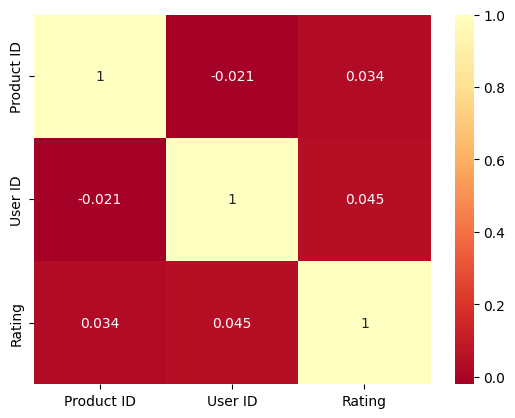

In [122]:
sns.heatmap(df_corr.corr(),center = True , annot=True,cmap="RdYlBu")

HeatMap Of Product ID,User ID and Rating

# Scatter plot between Brand vs Color

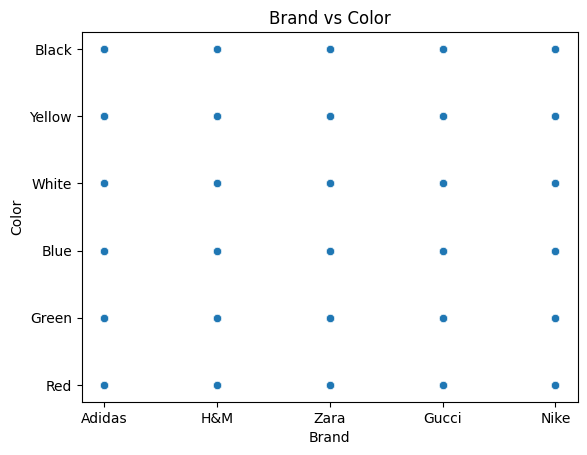

In [123]:
sns.scatterplot(x='Brand', y='Color', data=Fashion)
plt.title('Brand vs Color')
plt.show()

# Box plot of the Brand and Rating by genre.

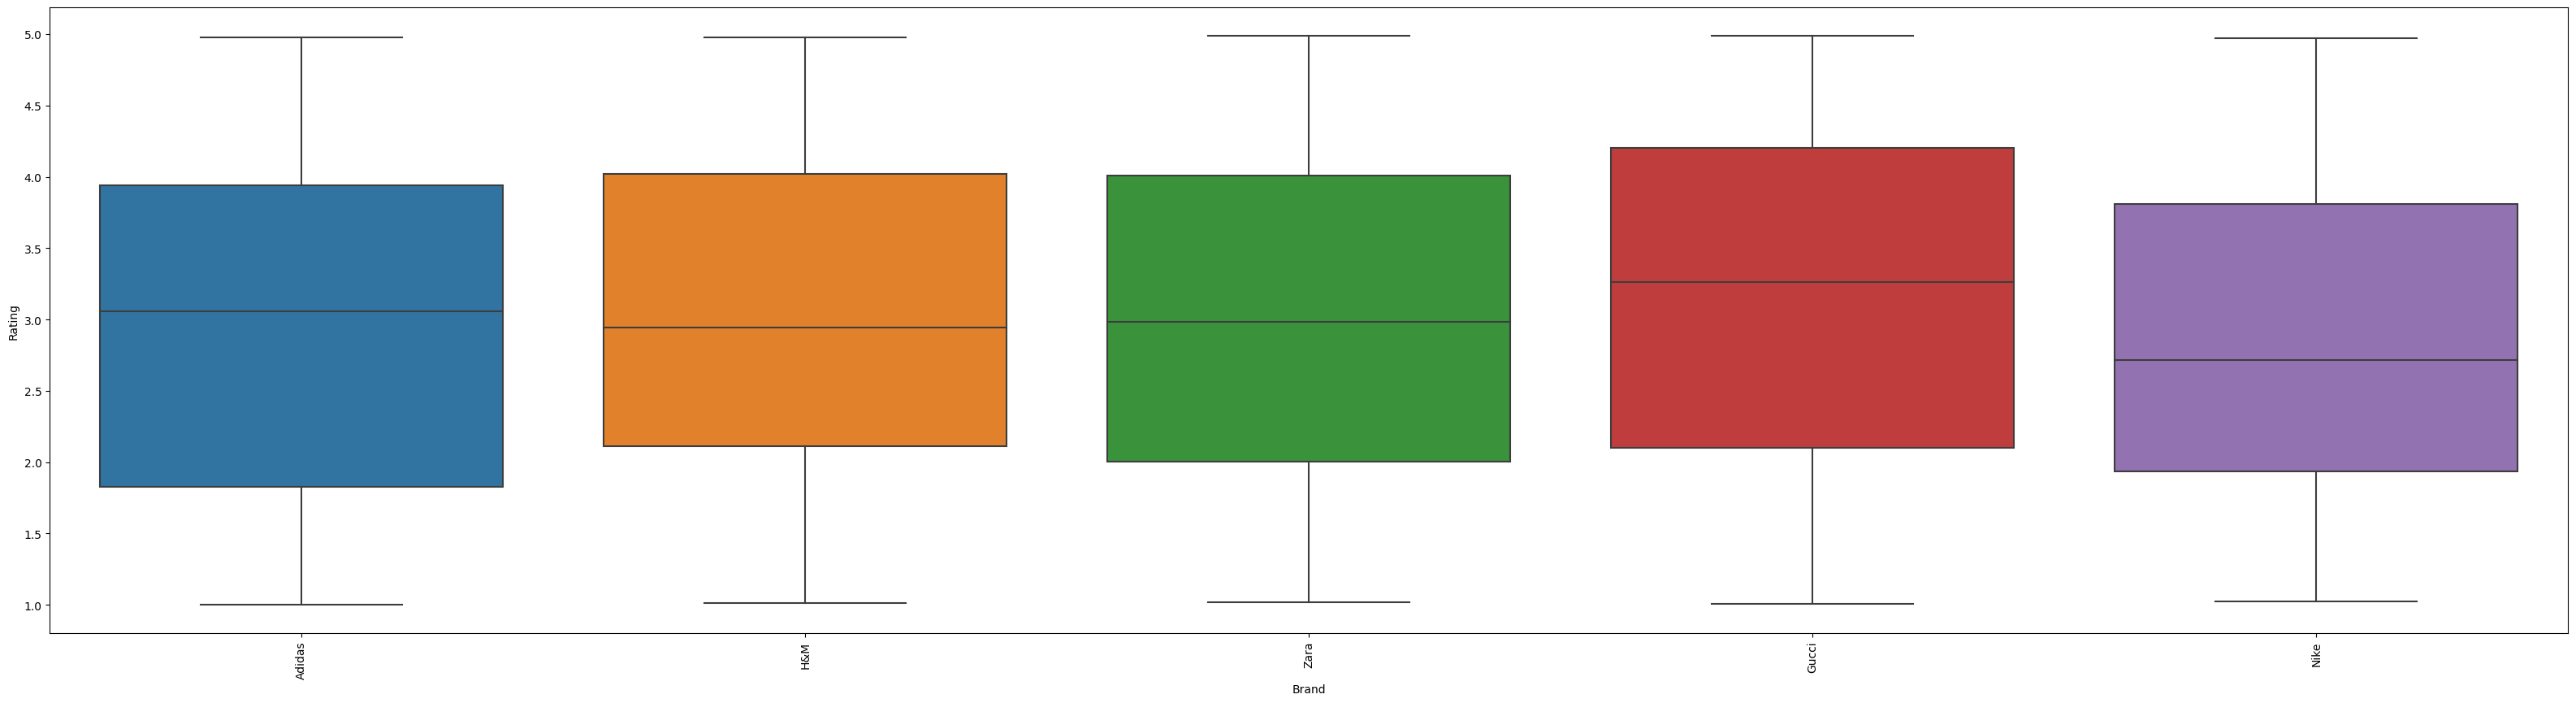

In [124]:
plt.figure(figsize=(40, 10))
sns.boxplot(x='Brand', y='Rating', data=Fashion)
plt.xticks(rotation=90)
plt.show()